### Ejemplo con few shot examples: análisis de sentimientos



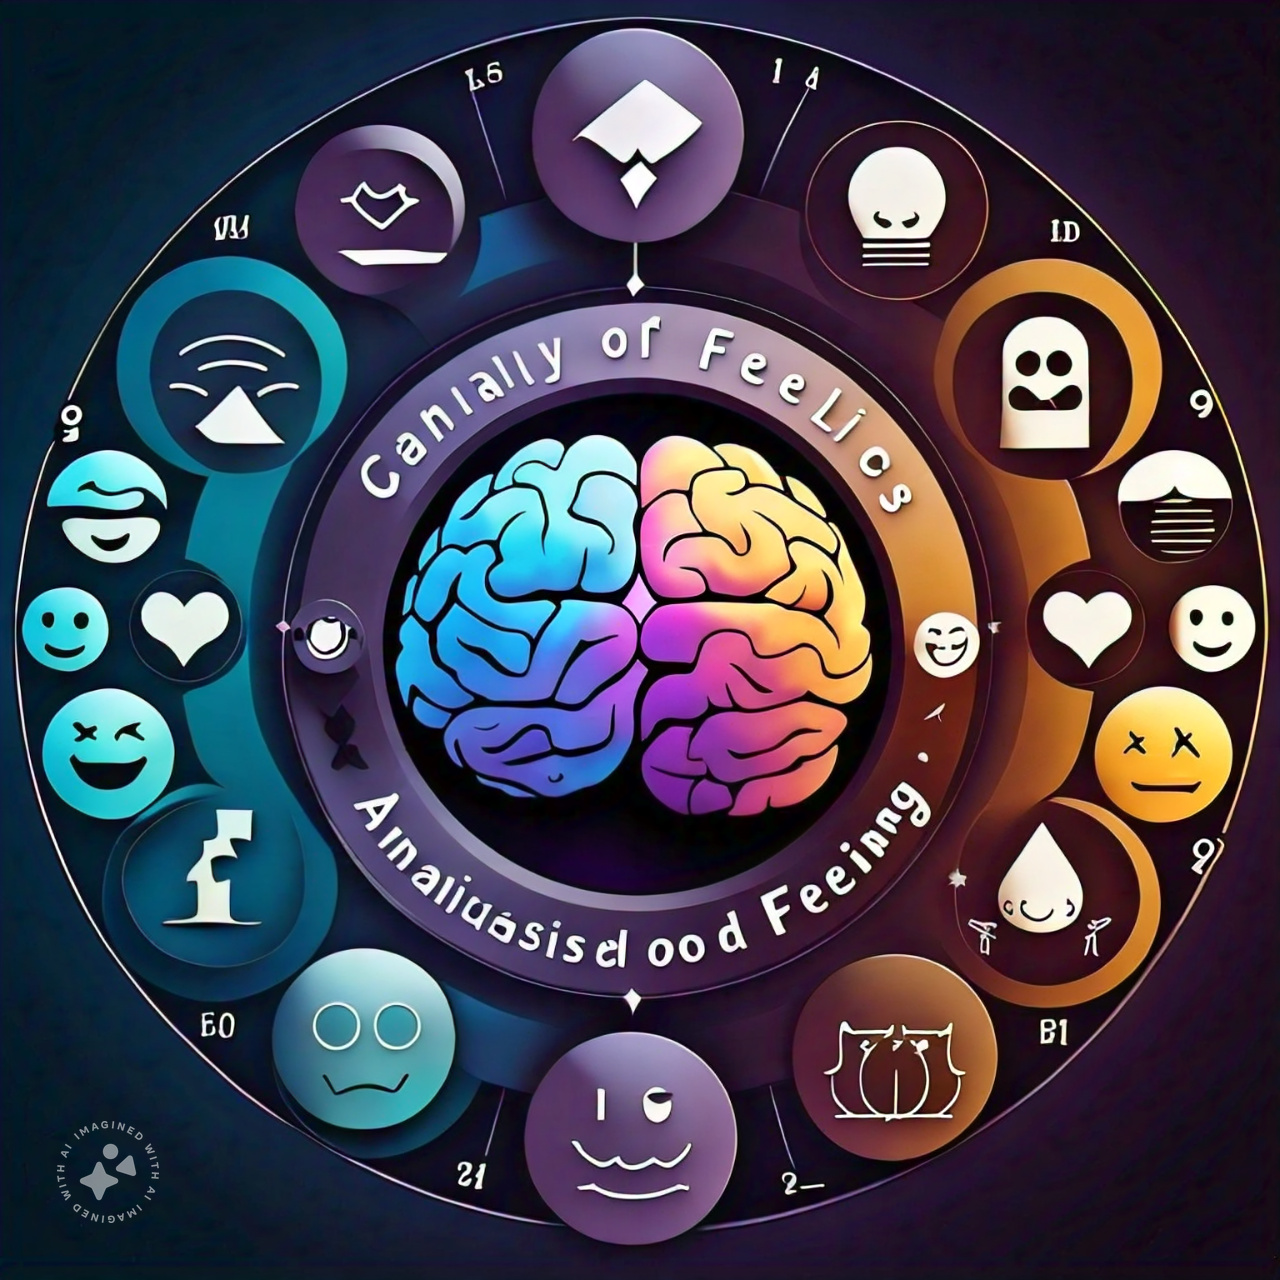

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate, FewShotPromptTemplate


In [ ]:
local_llm = 'llama3'
llm = ChatOllama(model=local_llm, temperature=0)

In [ ]:

parser = StrOutputParser()

In [ ]:
chain1 = llm | parser

Analiza la respuesta del modelo sin dar ejemplos del formato de la respuesta:

In [ ]:
chain1.invoke('Classify the sentiment of this sentence:the movie was fantastic!')

'The sentiment of this sentence is POSITIVE. The word "fantastic" has a strong positive connotation, indicating that the speaker thoroughly enjoyed the movie and had a very good experience.'

Ahora creamos un ejemplo de prompt con pregunta/respuesta y un set de ejemplos de respuestas en el formato deseado:

In [ ]:
example_prompt = PromptTemplate.from_template("Question: {question}\n{answer}")
examples = [
    {
        "question": "Classify the sentiment of this sentence:the book wasn´t so good as I expected.",
        "answer": """
Sentiment: NEUTRAL/NEGATIVE
Do not write any explication please.
""",
    },
    {
        "question": "Classify the sentiment of this sentence:the book was good, I appreciated it",
        "answer": """
Sentiment: POSITIVE
Do not write any explication please.
""",
    },
    {
        "question": "Classify the sentiment of this sentence:the book was fantastic!",
        "answer": """
Sentiment: VERY POSITIVE
Do not write any explication please.
""",
    },
    {
        "question": "Classify the sentiment of this sentence:the book was horrible!",
        "answer": """
Sentiment: NEGATIVE/VERY NEGATIVE
Do not write any explication please.
""",
    },
]

Analiza la respuesta del modelo:

In [ ]:
prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

chain = prompt | llm | parser
print(
    chain.invoke({"input": "Classify the sentiment of this sentence:the movie was fantastic!"})
)

Sentiment: VERY POSITIVE
